Filter methods select variables by assessing the “merits” of the features and ignoring the machine
learning algorithm. Filter methods usually involve a step of variable ranking and a step of feature
selection based on this ranking

Mutual information (MI) measures the mutual dependence between two random variables. The MI
“quantifies” the amount of information we can know from one variable by observing the values of
the second variable.
MI quantifies the amount of information, and as such, it has units. The units can be bits, nats, or
hartleys, as we will see in the coming paragraphs.
For many reasons, MI offers a good statistic for measuring the association between variables and
target.

• It detects any type of relationship, not just linear ones.

• MI has a straightforward interpretation: the amount of shared information between variables
is measured in, for example, bits.

• MI is insensitive to the size of the data sets (contrary to the p values derived from statistical tests
like chi-square, ANOVA, or correlation, which can be pushed arbitrarily low in large datasets,
even if the variables are slightly related).

• MI can be used with discrete and continuous predictors and discrete and continuous targets,
offering a suitable solution for most datasets.

MI is closely related to the concept of entropy. Thus, in the following sections, we will first introduce
the entropy, then explain how we calculate the entropy of a discrete variable. We will follow up
with an illustration of how we determine the MI of a pair of discrete variables. We will extend
the definition of MI for continuous variables and finally explain how we can estimate the MI for
continuous features. We will finish this chapter with a Python implementation of feature selection
based on MI.

# Import libraries

In [25]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Import data

In [2]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [3]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Mutual information

In [5]:
mi = mutual_info_regression(X_train, y_train)

Text(0.5, 1.0, 'Mutual information between predictors and target')

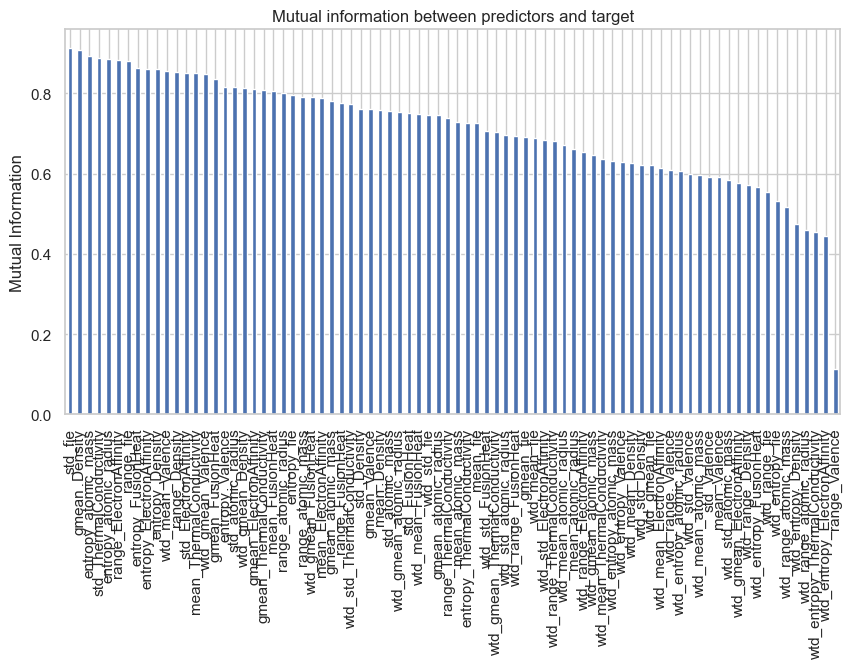

In [6]:
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [7]:
sel = SelectPercentile(mutual_info_regression,
                       percentile=60).fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['mean_atomic_mass', 'gmean_atomic_mass', 'entropy_atomic_mass',
       'range_atomic_mass', 'std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie',
       'gmean_atomic_radius', 'wtd_gmean_atomic_radius',
       'entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'range_Density', 'std_Density',
       'mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'range_ElectronAffinity',
       'std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat',
       'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat',
       'range_FusionHeat', 'wtd_range_FusionHeat', 'std_FusionHeat',
       'wtd_std_FusionHeat', 'mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'range_ThermalCond

In [8]:
X_train_m = sel.transform(X_train)
X_test_m = sel.transform(X_test)

In [9]:
X_train_m = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test_m = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

X_train_m.head()

,mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,entropy_fie,range_fie,std_fie,...,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence
15511,55.373780,18.464990,0.683843,105.41206,43.098264,950.333333,1034.773098,1.063757,575.1,256.716476,...,10.525894,4.651179,0.693425,90.81950,38.963777,35.470359,2.614130,2.000000,2.112285,0.955700
2892,72.816957,52.075936,0.838545,122.90607,50.602625,866.400000,1015.201551,1.029822,772.0,326.649119,...,5.170344,0.592118,0.140516,399.97342,185.567013,137.850150,2.282087,2.289428,2.242349,1.078992
3650,71.885607,60.708840,1.811361,121.32760,35.914688,699.014286,996.111539,1.886926,810.6,260.170348,...,18.196006,1.054309,1.144411,399.97342,137.774946,142.685658,2.123077,2.245649,2.102339,1.927392
9028,104.365600,72.746865,1.129463,184.59060,70.392496,891.650000,1014.844325,1.328085,810.6,301.512840,...,6.313081,0.790837,0.270718,399.97342,169.524558,127.993444,2.000000,2.000000,2.000000,1.386294
19291,85.856759,80.031150,1.534555,96.11900,34.981246,711.860000,791.682800,1.587255,399.3,150.346381,...,45.431663,51.921398,1.445288,86.00000,30.676375,22.255101,3.736000,3.245342,3.567305,1.564370


In [10]:
X_train_m.shape, X_test_m.shape

((16954, 48), (4239, 48))

# Scaling

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_m)

X_test_sc=min_max_scaler.fit_transform(X_test_m)

In [14]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [16]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [18]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0804
Test MAE (LR_baseline) : 0.0817 

Train R^2 (LR_baseline): 0.6716
Test R^2 (LR_baseline) : 0.6682 



# Cross-Validation

In [22]:
list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    CatBoostRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']),
        np.mean(cv_result['test_neg_mean_absolute_error']) 
    ]

print(cv_results)

                             fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      108.717848    0.042484               -0.002605   
XGBRegressor                13.146225    0.004239               -0.002891   
KNeighborsRegressor          0.009593    0.108278               -0.003642   
LGBMRegressor                1.186616    0.006894               -0.003190   
SVR                          6.308527    0.373860               -0.007103   
DecisionTreeRegressor        0.962711    0.001459               -0.004159   
GradientBoostingRegressor   27.485070    0.002525               -0.004993   
CatBoostRegressor           37.471146    0.016662                     NaN   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.028160  
XGBRegressor                             -0.031960  
KNeighborsRegressor                      -0.033693  
LGBMRegressor                            -0.035796  
SVR                                      

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\catboost\core.py", line 5734, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\Margarita\anaconda3\envs\The

In [23]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  66.055656    0.084196               -0.002966


# RandomForestRegressor

In [29]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_12352\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.006452446361022273
Mean Absolute Error (MAE): 0.055543141915483436
R-squared (R2): 0.8127752737312045
mape: 7.20820518207668


# XGBRegressor

In [30]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.005891658623386683
Mean Absolute Error (MAE): 0.05069605356453883
R-squared (R2): 0.8290471378892641
mape: 7.567300192012628


# CatBoostRegressor

In [31]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1720878	total: 11.2ms	remaining: 2.22s
50:	learn: 0.0700721	total: 550ms	remaining: 1.6s
100:	learn: 0.0630817	total: 1.11s	remaining: 1.08s
150:	learn: 0.0583267	total: 1.67s	remaining: 542ms
199:	learn: 0.0550765	total: 2.21s	remaining: 0us
Mean Squared Error (MSE): 0.005518042305365194
Mean Absolute Error (MAE): 0.05051459363867527
R-squared (R2): 0.8398880203944921
mape: 7.908342222005072
